## Observations and Insights 

In [397]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merging both frames into a unique frame
data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [398]:
# Checking the number of mice in the DataFrame.
total_mice = data["Mouse ID"].nunique()
print(f"Total of mice: {total_mice}")

Total of mice: 249


In [399]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = data[data.duplicated(["Mouse ID", "Timepoint"])]
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [400]:
# Optional: Get all the data for the duplicate mouse ID. 


In [401]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_frame = data.drop_duplicates(["Mouse ID","Timepoint"])
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Drug Regimen        1888 non-null   object 
 2   Sex                 1888 non-null   object 
 3   Age_months          1888 non-null   int64  
 4   Weight (g)          1888 non-null   int64  
 5   Timepoint           1888 non-null   int64  
 6   Tumor Volume (mm3)  1888 non-null   float64
 7   Metastatic Sites    1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB


In [402]:
# Checking the number of mice in the clean DataFrame.
total  = data_frame["Mouse ID"].nunique()
print("Total mice: "+str(total))

Total mice: 249


## Summary Statistics

In [403]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM
# of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

group_by_drug_regimen = data_frame.groupby("Drug Regimen")
means = round( group_by_drug_regimen["Tumor Volume (mm3)"].mean(), 3)
medians = round( group_by_drug_regimen["Tumor Volume (mm3)"].median(), 3)
variances = round( group_by_drug_regimen["Tumor Volume (mm3)"].var(), 3)
stds = round( group_by_drug_regimen["Tumor Volume (mm3)"].std(), 3)
sems = round( group_by_drug_regimen["Tumor Volume (mm3)"].sem(), 3)
summary = pd.DataFrame({
    "Mean":means,
    "Median" : medians,
    "Variance" : variances,
    "Standard Deviation" : stds,
    "SEM" : sems
})
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.393,50.910,43.139,6.568,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar Plots

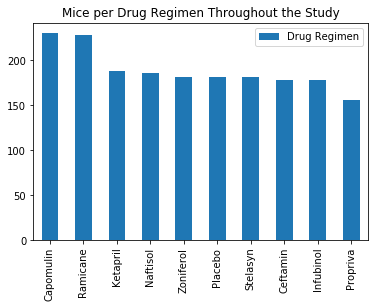

In [404]:
# Generate a bar plot showing the number of mice per time point for each
# treatment throughout the course of the study using pandas.
counts = data_frame["Drug Regimen"].value_counts()
counts_frame = pd.DataFrame(counts)
counts_frame.plot(kind="bar", title = "Mice per Drug Regimen Throughout the Study")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

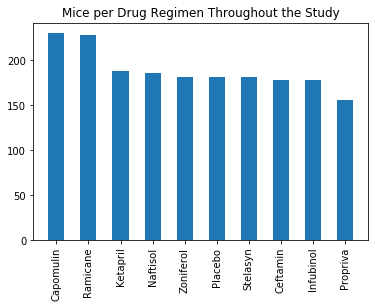

In [405]:
# Generate a bar plot showing the number of mice per time point for each
# treatment throughout the course of the study using pyplot.
plt.bar(counts.index, counts, width = 0.5)
plt.title("Mice per Drug Regimen Throughout the Study")
plt.xticks(rotation = 90)

## Pie Plots

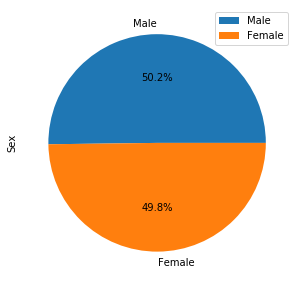

In [406]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

frame_timepoint_0 = data_frame.drop_duplicates(["Mouse ID"])
counts_sex = frame_timepoint_0.Sex.value_counts()
counts_sex_frame = pd.DataFrame(counts_sex)
counts_sex_frame.plot(kind="pie", y="Sex", figsize=(5,5), autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x20064517c08>,
 [Text(-0.008673969970957074, 1.3749726405441465, 'Male'),
  Text(0.008673969970956905, -1.3749726405441465, 'Female')],
 [Text(-0.004731256347794767, 0.7499850766604436, '50.2%'),
  Text(0.0047312563477946755, -0.7499850766604436, '49.8%')])

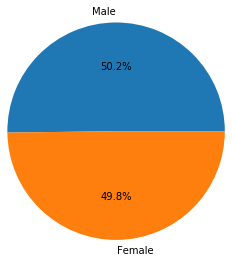

In [407]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts_sex,labels = counts_sex.index, radius=1.25,  autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [408]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
aux_frame = data_frame.sort_values(["Mouse ID", "Timepoint"], ascending=False)
# Taking the last timepoint for each entry, each mouse
frame_last_timepoint = aux_frame.drop_duplicates("Mouse ID")
# Auxiliar frame indexed by 'Drug Regimen'
new = frame_last_timepoint.set_index('Drug Regimen')
capomulin = new.loc['Capomulin', "Tumor Volume (mm3)"]
ramicane = new.loc['Ramicane', "Tumor Volume (mm3)"]
infubinol = new.loc['Infubinol', "Tumor Volume (mm3)"]
ceftamin = new.loc['Ceftamin', "Tumor Volume (mm3)"]

interest_drugs = [capomulin, ramicane, infubinol, ceftamin]

aux_dic = {"Drug Regimen":[], "Quartile(25%)":[], "Median":[], "Quartile(75%)":[], "IQR":[],
           "Lower Bound":[], "Upper Bound":[]}
for drug in interest_drugs:
    quartiles = round(drug.quantile([.25,.5,.75]), 2)
    aux_dic['Drug Regimen'].append(drug.index[0])
    q25 = quartiles[0.25]
    q50 = quartiles[0.5]
    q75 = quartiles[0.75]
    iqr = quartiles[0.75] - quartiles[0.25]
    aux_dic['Quartile(25%)'].append( q25)
    aux_dic['Median'].append( q50 )
    aux_dic['Quartile(75%)'].append( q75)
    aux_dic['IQR'].append(iqr)
    aux_dic['Lower Bound'].append((q25 - (1.5 *iqr )))
    aux_dic['Upper Bound'].append((q75 + (1.5 *iqr )))

quartiles_frame = pd.DataFrame(aux_dic)
quartiles_frame = quartiles_frame.set_index('Drug Regimen')
quartiles_frame



,Quartile(25%),Median,Quartile(75%),IQR,Lower Bound,Upper Bound
Drug Regimen,,,,,,
Capomulin,32.38,38.13,40.16,7.78,20.71,51.83
Ramicane,31.56,36.56,40.66,9.10,17.91,54.31
Infubinol,54.05,60.17,65.53,11.48,36.83,82.75
Ceftamin,48.72,59.85,64.30,15.58,25.35,87.67


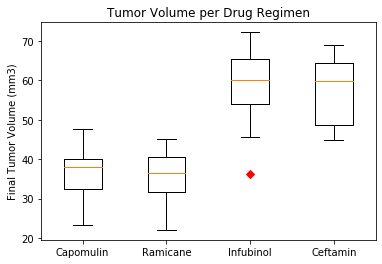

In [409]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume per Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot([capomulin, ramicane, infubinol, ceftamin], labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], sym = "rD")
plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse b128 treated with Capomulin')

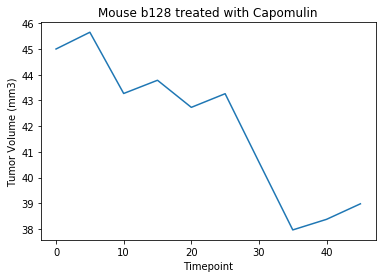

In [410]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
drug_reg = "Capomulin"
ax_frame = data_frame.loc[data_frame["Drug Regimen"] == drug_reg].sort_values(["Mouse ID", "Timepoint"])
mouse_id = "b128"
mouse_frame = ax_frame.loc[ax_frame["Mouse ID"]==mouse_id]

plt.plot(mouse_frame["Timepoint"], mouse_frame["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Mouse {mouse_id} treated with {drug_reg}")

Text(0.5, 1.0, 'Mouses treated with Capomulin')

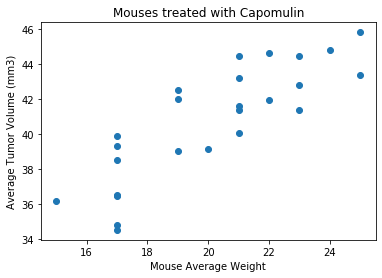

In [411]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
axlr = ax_frame.groupby("Mouse ID")
mean_weight = round(axlr["Weight (g)"].mean(), 4)
mean_tumor = round(axlr["Tumor Volume (mm3)"].mean(), 4)
# mean_tumor_frame = pd.DataFrame(round(axlr["Tumor Volume (mm3)"].mean(), 4))
# plt.scatter(mean_tumor_frame.index, mean_tumor_frame)
plt.scatter(mean_weight, mean_tumor)
plt.xlabel("Mouse Average Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title(f"Mouses treated with {drug_reg}")

## Correlation and Regression

The r-squared is: 0.7088575499583597


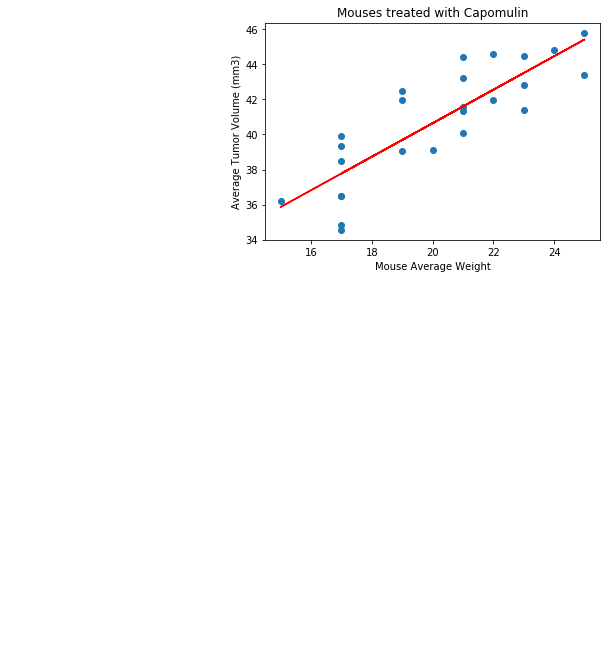

In [415]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(mean_weight, mean_tumor)
regress_values = mean_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mean_weight, mean_tumor)
plt.plot(mean_weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Average Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title(f"Mouses treated with {drug_reg}")
print(f"The r-squared is: {rvalue**2}")
plt.show()